## Sameer Pandey- Machine Learning Project

## Income_Qualification project

## Understand the data


In [374]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

In [309]:
#Load the dataset
df_income_train = pd.read_csv(r"F:\SIMPLILEARN\Machine_Learning\Income_Qualification\Dataset for the project\train.csv")
df_income_test =  pd.read_csv(r"F:\SIMPLILEARN\Machine_Learning\Income_Qualification\Dataset for the project\test.csv")

In [310]:
df_income_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [311]:
df_income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [312]:
df_income_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [313]:
df_income_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [314]:
#List the columns of diffrent datatypes:
print('Integer Type:')
print(df_income_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type:')
print(df_income_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type:')
print(df_income_train.select_dtypes(np.object).columns)


Integer Type:
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type:
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type:
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [315]:
df_income_train.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [316]:
#Find columns with null values
null_counts= df_income_train.select_dtypes('int64').isnull().sum()
null_counts[null_counts>0]

Series([], dtype: int64)

In [317]:
df_income_train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [318]:
#Find columns with null values
null_counts= df_income_train.select_dtypes('float64').isnull().sum()
null_counts[null_counts>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [319]:
df_income_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [320]:
#Find columns with null values
null_counts= df_income_train.select_dtypes('object').isnull().sum()
null_counts[null_counts>0]

Series([], dtype: int64)

In [321]:
We also noticed that object type features dependency, edjefe, edjefa have mixed values.
Lets fix the data for features with null values and features with mixed values

SyntaxError: invalid syntax (<ipython-input-321-f51f277cebf3>, line 1)

## Data cleaning

In [322]:
mapping={'yes':1,'no':0}
for df in [df_income_train, df_income_test]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)
    
df_income_train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


## Lets fix the column with null values
According to the documentation for these columns:

v2a1 (total nulls: 6860) : Monthly rent payment
v18q1 (total nulls: 7342) : number of tablets household owns
rez_esc (total nulls: 7928) : Years behind in school
meaneduc (total nulls: 5) : average years of education for adults (18+)
SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

In [323]:
data = df_income_train[df_income_train['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


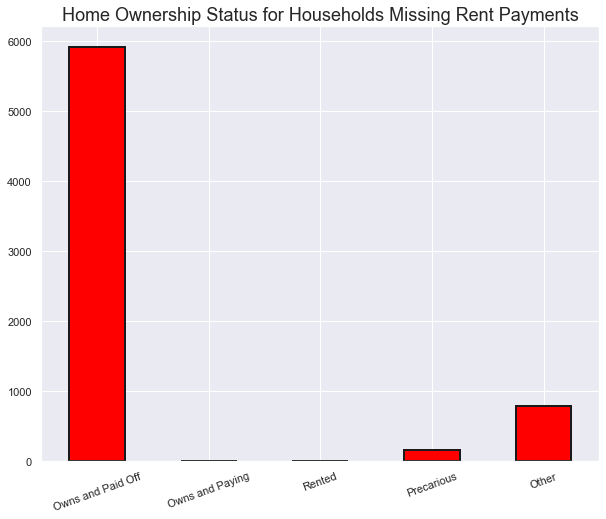

In [324]:
# Variables indicating home ownership
own_variables = [x for x in df_income_train if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
df_income_train.loc[df_income_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),color = 'red', edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [325]:
#Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.
#Lets add 0 for all the null values.
for df in [df_income_train, df_income_test]:
    df['v2a1'].fillna(value=0, inplace=True)

df_income_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [326]:
# Since this is a household variable, it only makes sense to look at it on a household level, 
# so we'll only select the rows for the head of household.

# Heads of household
heads = df_income_train.loc[df_income_train['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())


v18q
0    2318
1       0
Name: v18q1, dtype: int64

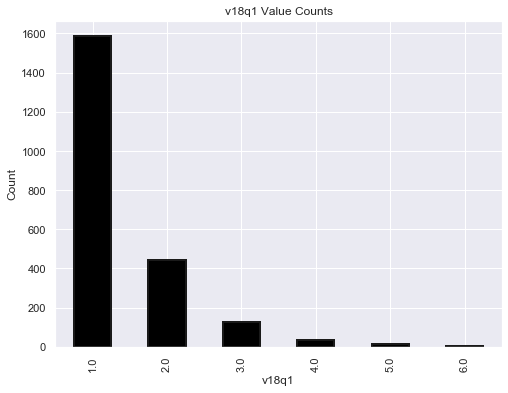

In [327]:
plt.figure(figsize = (8, 6))
col='v18q1'
df_income_train[col].value_counts().sort_index().plot.bar(color = 'Black',
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show();

In [328]:
#Looking at the above data it makes sense that when owns a tablet column is 0, there will be no number of tablets household owns.
#Lets add 0 for all the null values.
for df in [df_income_train, df_income_test]:
    df['v18q1'].fillna(value=0, inplace=True)

df_income_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [329]:
# Lets look at rez_esc    (total nulls: 7928) : Years behind in school  
# why the null values, Lets look at few rows with nulls in rez_esc
# Columns related to Years behind in school 
# Age in years

# Lets look at the data with not null values first.
df_income_train[df_income_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [330]:
#From the above , we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has a value.
#Lets confirm
df_income_train.loc[df_income_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [331]:
df_income_train.loc[(df_income_train['rez_esc'].isnull() & ((df_income_train['age'] > 7) & (df_income_train['age'] < 17)))]['age'].describe()
#There is one value that has Null for the 'behind in school' column with age between 7 and 17 

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [332]:
df_income_train[(df_income_train['age'] ==10) & df_income_train['rez_esc'].isnull()].head()
df_income_train[(df_income_train['Id'] =='ID_f012e4242')].head()
#there is only one member in household for the member with age 10 and who is 'behind in school'. This explains why the member is 
#behind in school.

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [333]:
#from above we see that  the 'behind in school' column has null values 
# Lets use the above to fix the data
for df in [df_income_train, df_income_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
df_income_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [334]:
#Lets look at meaneduc   (total nulls: 5) : average years of education for adults (18+)  
# why the null values, Lets look at few rows with nulls in meaneduc
# Columns related to average years of education for adults (18+)  
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
#    head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education), 
#    head of household and gender, yes=1 and no=0 
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary

In [335]:
data = df_income_train[df_income_train['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [336]:
#from the above, we find that meaneduc is null when no level of education is 0
#Lets fix the data
for df in [df_income_train, df_income_test]:
    df['meaneduc'].fillna(value=0, inplace=True)
df_income_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [337]:
data = df_income_train[df_income_train['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [338]:
#from the above, we find that SQBmeaned is null when no level of education is 0
#Lets fix the data
for df in [df_income_train, df_income_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
df_income_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [339]:
#Lets look at the overall data
null_counts = df_income_train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

## Lets look towards the target column

In [340]:
# Groupby the household and figure out the number of unique values
all_equal = df_income_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [341]:
#Lets check one household
df_income_train[df_income_train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [342]:
#Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
# if all families has a head. 

households_head = df_income_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = df_income_train.loc[df_income_train['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [343]:
# Find households without a head and where Target value are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


In [344]:
#Lets fix the data
#Set poverty level of the members and the head of the house within a family.
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(df_income_train[(df_income_train['idhogar'] == household) & (df_income_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    df_income_train.loc[df_income_train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = df_income_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [345]:
#Check Dataset
#Lets look at the dataset and plot head of household and Target
# 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households 
target_counts = heads['Target'].value_counts().sort_index()
target_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

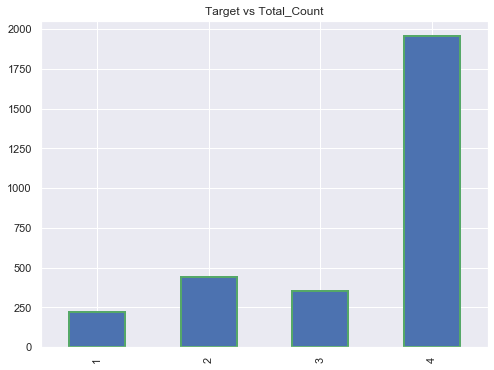

In [346]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'g',title="Target vs Total_Count")

In [347]:
# extreme poverty is the smallest count in the train dataset. The dataset is biased.

## Lets look at the Squared Variables
‘SQBescolari’
‘SQBage’
‘SQBhogar_total’
‘SQBedjefe’
‘SQBhogar_nin’
‘SQBovercrowding’
‘SQBdependency’
‘SQBmeaned’
‘agesq’

In [348]:
#Lets remove them
print(df_income_train.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


for df in [df_income_train, df_income_test]:
    df.drop(columns = cols,inplace=True)

print(df_income_train.shape)

(9557, 143)
(9557, 134)


In [349]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [350]:
#Check for redundant household variables
heads = df_income_train.loc[df_income_train['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [351]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [352]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


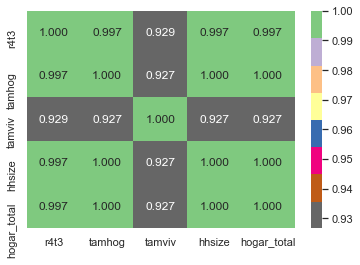

In [353]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

In [354]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [df_income_train, df_income_test]:
    df.drop(columns = cols,inplace=True)

df_income_train.shape

(9557, 131)

In [355]:
#Check for redundant Individual variables
ind = df_income_train[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [356]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [357]:
# This is simply the opposite of male! We can remove the male flag.
for df in [df_income_train, df_income_test]:
    df.drop(columns = 'male',inplace=True)

df_income_train.shape

(9557, 130)

In [358]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

for df in [df_income_train, df_income_test]:
    df.drop(columns = 'area2',inplace=True)

df_income_train.shape

(9557, 129)

In [359]:
#Finally lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [df_income_train, df_income_test]:
    df.drop(columns = cols,inplace=True)

df_income_train.shape

(9557, 127)

In [360]:
x_features=df_income_train.iloc[:,0:-1]
y_features=df_income_train.iloc[:,-1]
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [361]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

In [362]:
rmclassifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:
y_predict = rmclassifier.predict(x_test)

In [364]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9513598326359832
[[ 135    1    0   21]
 [   0  288    0   29]
 [   0    2  194   37]
 [   0    3    0 1202]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92       157
           2       0.98      0.91      0.94       317
           3       1.00      0.83      0.91       233
           4       0.93      1.00      0.96      1205

    accuracy                           0.95      1912
   macro avg       0.98      0.90      0.93      1912
weighted avg       0.95      0.95      0.95      1912



In [365]:
y_predict_testdata = rmclassifier.predict(df_income_test)

In [366]:
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [367]:
# Check accuracy with random forest cross validatiion
from sklearn.model_selection import KFold,cross_val_score

In [368]:
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


In [369]:
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


In [373]:
rmclassifier.fit(x_features, y_features)
y_predict_testdata = rmclassifier.predict(df_income_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

Looking at the accuracy score, RandomForestClassifier with cross validation has the highest accuracy score of 94.60%
To get a better sense of what is going on inside the RandomForestClassifier model, lets visualize how our model uses the different features and which features have greater effect.

In [ ]:
rmclassifier.fit(x_features,y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rmclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

In [ ]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')